In [29]:
from __future__ import print_function
import matplotlib.pyplot as plt 
import numpy as np

import astropy.units as units 
from astropy.coordinates import SkyCoord 
from astropy.coordinates import Angle 
from astroquery.irsa_dust import IrsaDust

import healpy as hp 
import pandas as pd 

from dustmaps.sfd import SFDQuery 
from dustmaps.planck import PlanckQuery 
from dustmaps.bayestar import BayestarQuery
import dustmaps.bayestar
dustmaps.bayestar.fetch()


import warnings
warnings.filterwarnings('ignore')
print('done importing')
#import getAVbest2

#import getAVbest import dustmaps.planck

#dustmaps.planck.fetch() print('done with importing')


694.1 MiB of 694.2 MiB |   8.4 MiB/s |################# |  99% | ETA:   0:00:00

done importing


In [24]:
name='UGC2855'
Coord = SkyCoord.from_name(name, frame = 'icrs')
print(Coord)
ra0=Coord.ra
dec0=Coord.dec
print('done')


<SkyCoord (ICRS): (ra, dec) in deg
    (57.08637917, 70.13288056)>
done


In [ ]:
ra = np.arange(ra0.degree - 2., ra0.degree + 2., 0.05)
dec = np.arange(dec0.degree - 2., dec0.degree + 2., 0.05)
ra, dec = np.meshgrid(ra, dec)
coords = SkyCoord(ra*units.deg, dec*units.deg, frame='icrs')

sfd = SFDQuery()
# this conversion puts Av on the Schlafly system
Av_sfd = 2.742 * sfd(coords)

planck = PlanckQuery()
Av_planck = 3.1 * planck(coords)

In [ ]:
bayestar = BayestarQuery(max_samples=1)
Av_bayestar = 2.742 * bayestar(coords)

In [ ]:
ebv_map = hp.read_map('$SNFOLDER/github/ebv_tools/ebv_lhd.hpx.fits', verbose=False)
nside = hp.get_nside(ebv_map)
npix = hp.nside2npix(nside)
ordering = 'ring'


s_gal = coords.galactic
glon = s_gal.l.value
glat = s_gal.b.value
pix = hp.ang2pix(nside, glon, glat, lonlat=True)
ebv_los = ebv_map[pix]
Av_HI = ebv_los*2.742
print('done loading')

In [16]:
maxboth=max(np.amax(Av_planck),np.amax(Av_sfd))
print(maxboth)

2.6020184


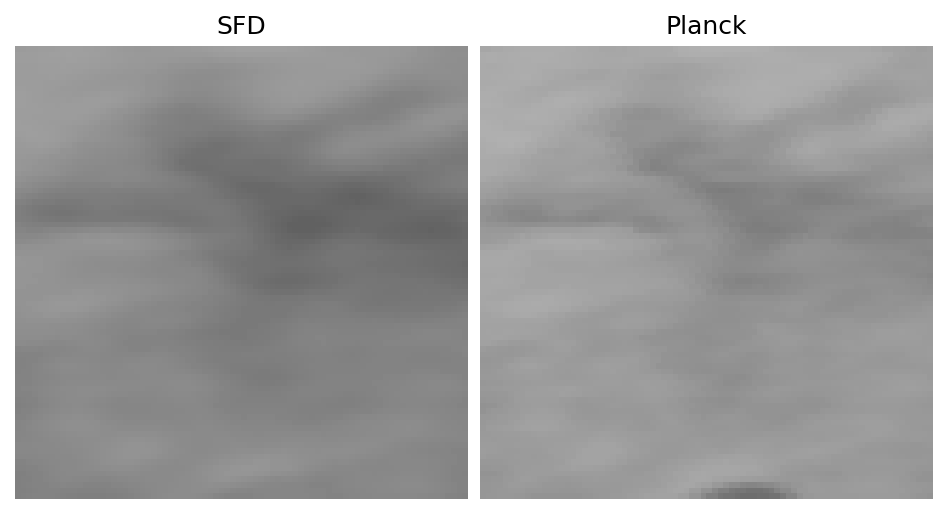

In [18]:
fig = plt.figure(figsize=(8,4), dpi=150)

for k,(Av,title) in enumerate([(Av_sfd, 'SFD'),
                               (Av_planck, 'Planck'),
                               (Av_bayestar, 'Bayestar')]):

    ax = fig.add_subplot(1,3,k+1)
    ax.imshow(
    np.sqrt(Av)[::,::-1],
    vmin=0.,
    vmax=maxboth,
    origin='lower',
    interpolation='nearest',
    cmap='binary',
    aspect='equal'
    )
    ax.axis('off')
    ax.set_title(title)

fig.subplots_adjust(wspace=0., hspace=0.)
plt.savefig(imagename, dpi=150)
